In [4]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# set the style of graph with whitegrid for smooth visibility
sns.set(style='whitegrid')

In [6]:
# import the necessary file
df=pd.read_csv('/content/credit_dataset.csv')

In [7]:
# understand the data
df.head()

,Customer_ID,Age,Gender,State,Education_Level,Annual_Income,Credit_Limit,Avg_Monthly_Spend,Num_Late_Payments,Credit_Utilization_Rate,Employment_Type,Credit_Score
0,USCUST100000,59,Female,Illinois,Bachelor’s Degree,66596,16202,1512,2,1.12,Full-Time,400
1,USCUST100001,72,Female,California,Associate Degree,96799,19004,2109,1,1.33,Retired,397
2,USCUST100002,49,Male,Michigan,Master’s Degree,58504,20415,1133,1,0.67,Full-Time,558
3,USCUST100003,35,Female,Georgia,High School,43591,11057,1280,1,1.39,Part-Time,326
4,USCUST100004,63,Female,California,Master’s Degree,80477,24745,1883,3,0.91,Full-Time,446


Text(0, 0.5, 'No. of Customers')

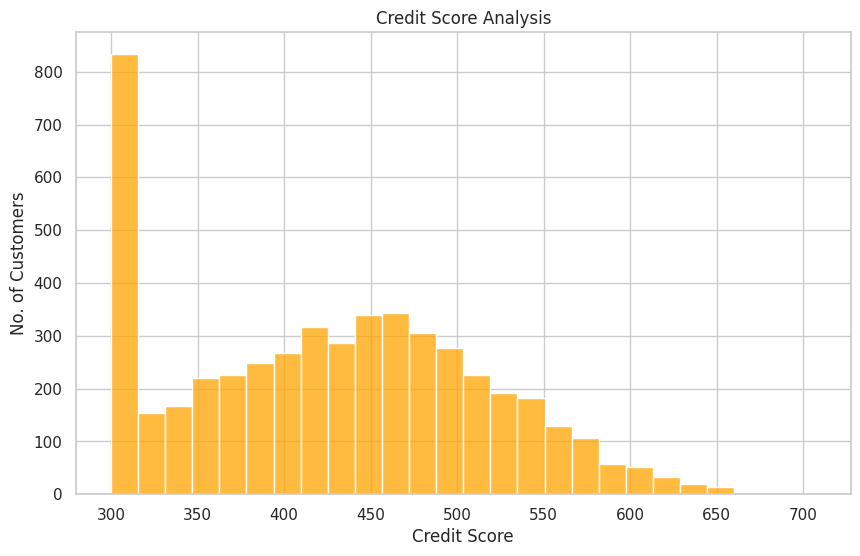

In [8]:
# create the graph for the first view -  know the credit score spread.

plt.figure(figsize= (10,6))
sns.histplot(df['Credit_Score'], color='orange')
plt.title("Credit Score Analysis")
plt.xlabel("Credit Score")
plt.ylabel("No. of Customers")

### Insight :  The Average Score in between 400 to 500, the graph is a healthy bell shaped curve. Very low and very high scores are rare.




/tmp/ipython-input-805401671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Employment_Type", y='Credit_Score', palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'Full-Time'),
  Text(1, 0, 'Retired'),
  Text(2, 0, 'Part-Time'),
  Text(3, 0, 'Unemployed')])

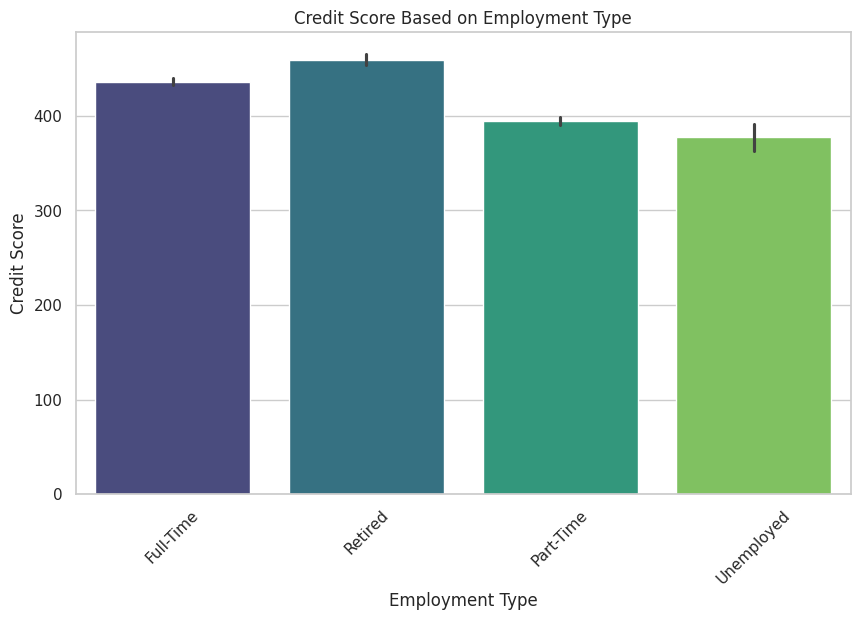

In [9]:
# Lets Analyse Credit Score based on the Employement.

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Employment_Type", y='Credit_Score', palette='viridis')
plt.title('Credit Score Based on Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)

## *Insight: Full-Time worker and Retired people show highter Credit Score, while Unemployed and Part-time Worker shows a lower Credit Score due to less financial stability.*

Text(0, 0.5, 'Credit Score')

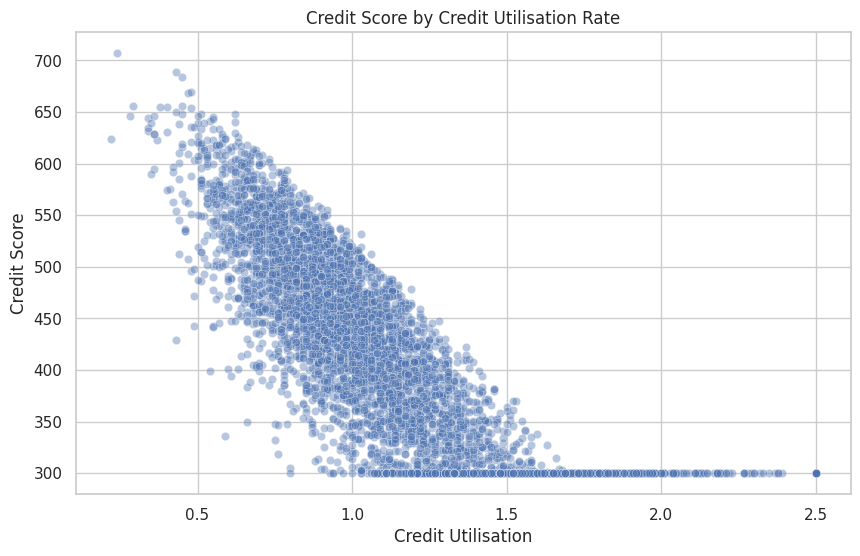

In [10]:
#Lets analyse how the credit utilisation affects the Credit Score

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Credit_Utilization_Rate',y='Credit_Score', alpha=0.4) # aplha is to set the transparenct of the dots of Scatterplot
plt.title('Credit Score by Credit Utilisation Rate')
plt.xlabel('Credit Utilisation')
plt.ylabel('Credit Score')


# *Insight: A clear negative Correlation appears between Credit Utlilisation Rate and the Credit Score. The Credit score decrease if the Credit Utilisaction is high, aligning with real world credit behaviour.*

Text(0, 0.5, 'Monthly Spend')

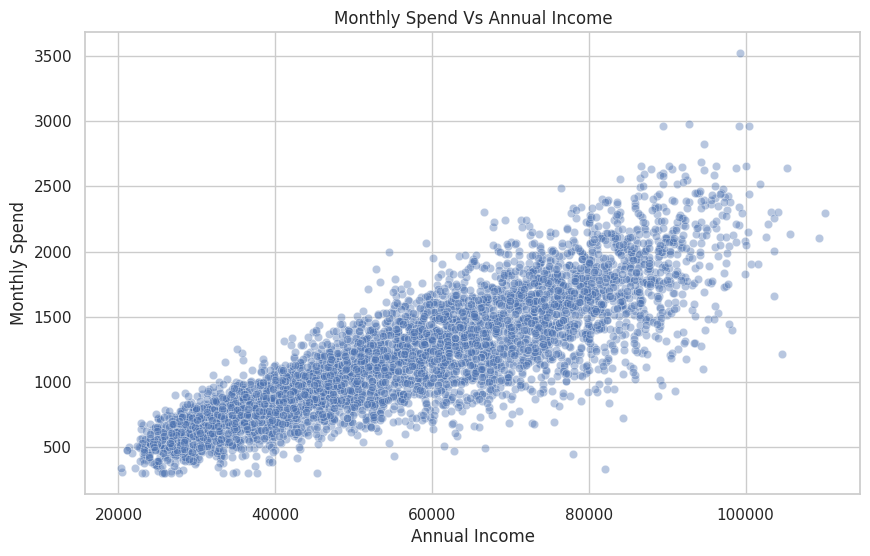

In [11]:
# Analyse the Monthly Spend amount by Annual Income, does it have any correlation ?

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual_Income' , y='Avg_Monthly_Spend', alpha=0.4)
plt.title('Monthly Spend Vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Monthly Spend')

## *Insight: Ingeneral the Monthly spend increases as the Annual Income increases, showing a positive correlation,  however its varies for few individual where the monthly spend is very low despite of high annual income. So we can also infer that spending habits vary even among high income users.*

/tmp/ipython-input-2146491841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education_Level',y='Credit_Score', palette='pastel')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bachelor’s Degree'),
  Text(1, 0, 'Associate Degree'),
  Text(2, 0, 'Master’s Degree'),
  Text(3, 0, 'High School'),
  Text(4, 0, 'Doctorate')])

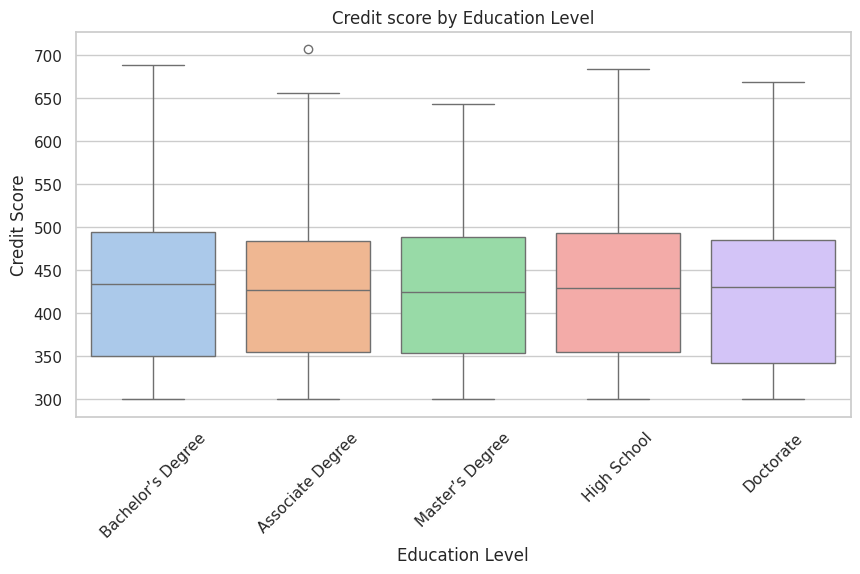

In [12]:
# Analyse the Credit Score based on Education level

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Education_Level',y='Credit_Score', palette='pastel')
plt.title('Credit score by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)

## *Insight: The credit score is not much varying based on the education level. There is not much correlation between them.*

Text(0.5, 1.0, 'Correlation Heatmap')

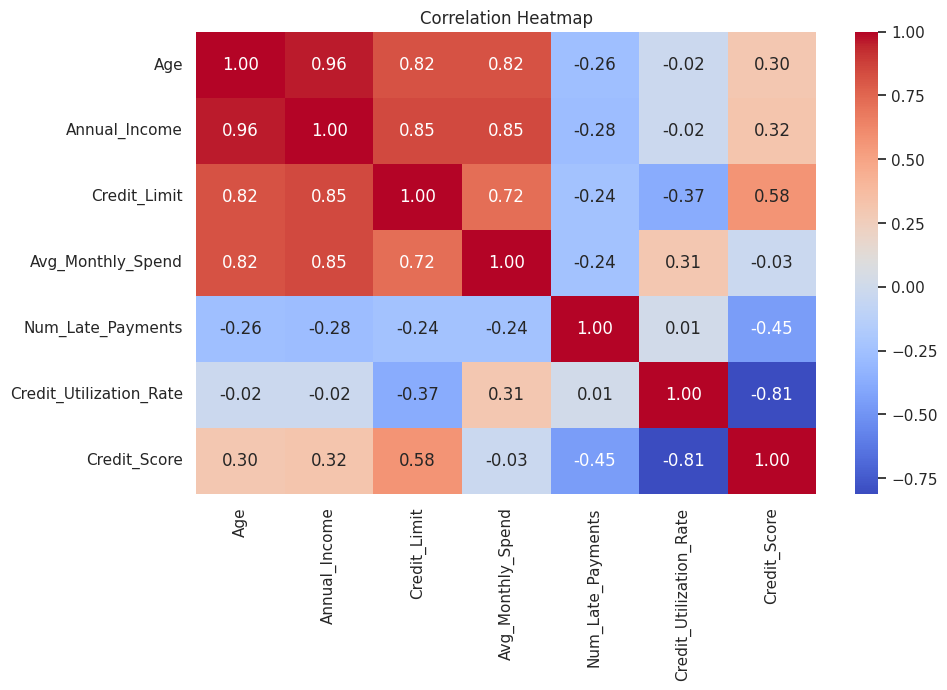

In [13]:
# Lets Explore the correlation between

plt.figure(figsize=(10,6))
correlation= df[['Age','Annual_Income','Credit_Limit','Avg_Monthly_Spend','Num_Late_Payments','Credit_Utilization_Rate','Credit_Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm' , fmt='.2f')
plt.title('Correlation Heatmap')

## *Insight : Creditcore has a strong Negative correlation between credit Utilization Rate and Late Payments. There is also a Positive Correlation between Credit limit and the Annual Income.*

In [14]:
# Lets now start Predicting the Score using Maching Learning :

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [16]:
df.head()

,Customer_ID,Age,Gender,State,Education_Level,Annual_Income,Credit_Limit,Avg_Monthly_Spend,Num_Late_Payments,Credit_Utilization_Rate,Employment_Type,Credit_Score
0,USCUST100000,59,Female,Illinois,Bachelor’s Degree,66596,16202,1512,2,1.12,Full-Time,400
1,USCUST100001,72,Female,California,Associate Degree,96799,19004,2109,1,1.33,Retired,397
2,USCUST100002,49,Male,Michigan,Master’s Degree,58504,20415,1133,1,0.67,Full-Time,558
3,USCUST100003,35,Female,Georgia,High School,43591,11057,1280,1,1.39,Part-Time,326
4,USCUST100004,63,Female,California,Master’s Degree,80477,24745,1883,3,0.91,Full-Time,446


In [17]:
# Drop all the unused columns :
df_model= df.drop(columns=['Customer_ID','State','Education_Level'])

In [18]:
from pandas.core.reshape.encoding import get_dummies
# Convert the Alphabetical columns to numerical columns.  ********************?????????????

df_model=pd.get_dummies(df_model, columns=['Employment_Type','Gender'], drop_first=True)

In [19]:
df_model

,Age,Annual_Income,Credit_Limit,Avg_Monthly_Spend,Num_Late_Payments,Credit_Utilization_Rate,Credit_Score,Employment_Type_Part-Time,Employment_Type_Retired,Employment_Type_Unemployed,Gender_Male
0,59,66596,16202,1512,2,1.12,400,False,False,False,False
1,72,96799,19004,2109,1,1.33,397,False,True,False,False
2,49,58504,20415,1133,1,0.67,558,False,False,False,True
3,35,43591,11057,1280,1,1.39,326,True,False,False,False
4,63,80477,24745,1883,3,0.91,446,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,46,51778,11002,1236,2,1.35,317,False,False,False,False
4996,35,37984,8024,777,5,1.16,300,True,False,False,False
4997,56,62893,19537,1273,2,0.78,498,False,False,False,True
4998,52,64976,10025,1353,1,1.62,300,False,False,False,False


In [20]:
df_model

,Age,Annual_Income,Credit_Limit,Avg_Monthly_Spend,Num_Late_Payments,Credit_Utilization_Rate,Credit_Score,Employment_Type_Part-Time,Employment_Type_Retired,Employment_Type_Unemployed,Gender_Male
0,59,66596,16202,1512,2,1.12,400,False,False,False,False
1,72,96799,19004,2109,1,1.33,397,False,True,False,False
2,49,58504,20415,1133,1,0.67,558,False,False,False,True
3,35,43591,11057,1280,1,1.39,326,True,False,False,False
4,63,80477,24745,1883,3,0.91,446,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,46,51778,11002,1236,2,1.35,317,False,False,False,False
4996,35,37984,8024,777,5,1.16,300,True,False,False,False
4997,56,62893,19537,1273,2,0.78,498,False,False,False,True
4998,52,64976,10025,1353,1,1.62,300,False,False,False,False


In [21]:
# Now lets define the inputs and the required output

x=df_model.drop(columns=['Credit_Score'])
y=df_model['Credit_Score']

In [22]:
# split the data for train and test :
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2 ,random_state=42)


In [23]:
# Feature scaling - to avoid overshadow due to large magnitude so we need to scale and standarise the value( eg:annual income -80000, credit score=1.5 )
scaler = StandardScaler()
x_train_scale= scaler.fit_transform(x_train)
x_test_scale= scaler.transform(x_test)

In [24]:
# Train the Model

model= RandomForestRegressor(n_estimators=100 , random_state=42)
model.fit(x_train_scale, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred = model.predict(x_test_scale)

In [26]:
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(f'Mean Absolute Error : {mae:.2f}')
print(f'Root Mean Square Error : {rmse:.2f}')
print(f'R2 Score: {r2: .2f}')

Mean Absolute Error : 2.93
Root Mean Square Error : 5.19
R2 Score:  1.00


Text(0, 0.5, 'Predicted Credit Score')

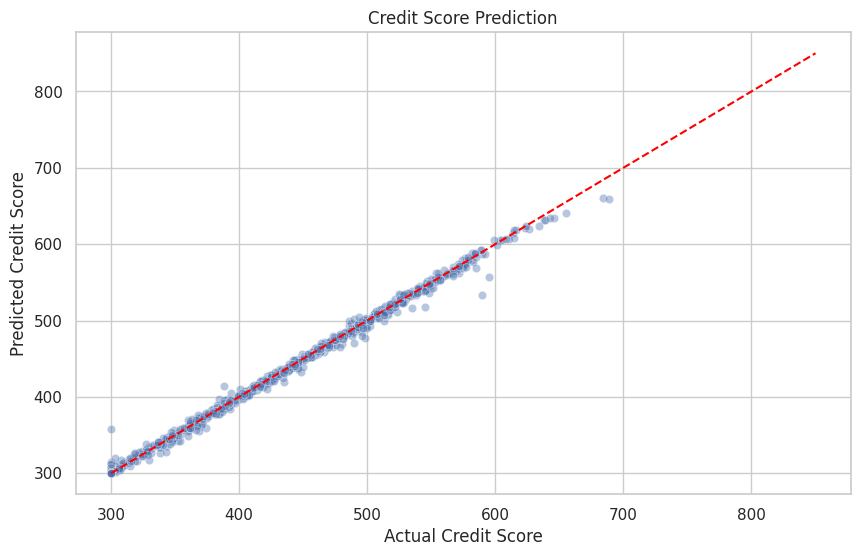

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y= y_pred, alpha=0.4)
plt.plot([300,850], [300,850], color='red', linestyle='--')
plt.title("Credit Score Prediction")
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')

# Insight : Actual Vs Predicted Credit Score
*  The scatterplot shows most predictions falling near the diagonal line, indicating a good model accuracy.
*   A few outliers may represent unique customer behaviors not fully captured by out features.
*   Overall, the model generalizes well and can estimte creditworthiness with reasonable confidence.

/tmp/ipython-input-2482136951.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, y = 'Feature',  x = 'Importance', palette='viridis' )


Text(0.5, 1.0, ' Important Features for Predicting Credit Scores')

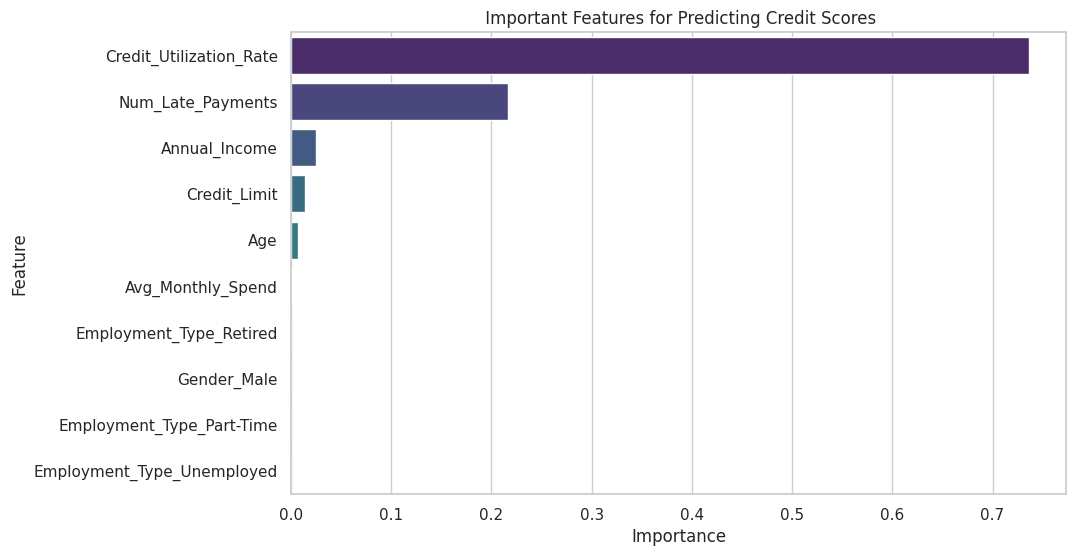

In [30]:
# Feature Importance

importances = model.feature_importances_
features = x.columns
feature_df= pd.DataFrame({'Feature' : features , 'Importance' : importances })
feature_df=feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_df, y = 'Feature',  x = 'Importance', palette='viridis' )
plt.title(" Important Features for Predicting Credit Scores")
